In [8]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

pd.set_option("display.max_columns",None)
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style("whitegrid")

In [9]:
survey = pd.read_csv('./kaggle-survey-2021/2021_response.csv')
survey.head(5)

/var/folders/pl/qbptr85s0v9f03zzwh9xfns80000gn/T/ipykernel_46596/3137564511.py:1: DtypeWarning: Columns (0,195,201,285,286,287,288,289,290,291,292) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('./kaggle-survey-2021/2021_response.csv')


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,Q7_Part_4,Q7_Part_5,Q7_Part_6,Q7_Part_7,Q7_Part_8,Q7_Part_9,Q7_Part_10,Q7_Part_11,Q7_Part_12,Q7_OTHER,Q8,Q9_Part_1,Q9_Part_2,Q9_Part_3,Q9_Part_4,Q9_Part_5,Q9_Part_6,Q9_Part_7,Q9_Part_8,Q9_Part_9,Q9_Part_10,Q9_Part_11,Q9_Part_12,Q9_OTHER,Q10_Part_1,Q10_Part_2,Q10_Part_3,Q10_Part_4,Q10_Part_5,Q10_Part_6,Q10_Part_7,Q10_Part_8,Q10_Part_9,Q10_Part_10,Q10_Part_11,Q10_Part_12,Q10_Part_13,Q10_Part_14,Q10_Part_15,Q10_Part_16,Q10_OTHER,Q11,Q12_Part_1,Q12_Part_2,Q12_Part_3,Q12_Part_4,Q12_Part_5,Q12_OTHER,Q13,Q14_Part_1,Q14_Part_2,Q14_Part_3,Q14_Part_4,Q14_Part_5,Q14_Part_6,Q14_Part_7,Q14_Part_8,Q14_Part_9,Q14_Part_10,Q14_Part_11,Q14_OTHER,Q15,Q16_Part_1,Q16_Part_2,Q16_Part_3,Q16_Part_4,Q16_Part_5,Q16_Part_6,Q16_Part_7,Q16_Part_8,Q16_Part_9,Q16_Part_10,Q16_Part_11,Q16_Part_12,Q16_Part_13,Q16_Part_14,Q16_Part_15,Q16_Part_16,Q16_Part_17,Q16_OTHER,Q17_Part_1,Q17_Part_2,Q17_Part_3,Q17_Part_4,Q17_Part_5,Q17_Part_6,Q17_Part_7,Q17_Part_8,Q17_Part_9,Q17_Part_10,Q17_Part_11,Q17_OTHER,Q18_Part_1,Q18_Part_2,Q18_Part_3,Q18_Part_4,Q18_Part_5,Q18_Part_6,Q18_OTHER,Q19_Part_1,Q19_Part_2,Q19_Part_3,Q19_Part_4,Q19_Part_5,Q19_OTHER,Q20,Q21,Q22,Q23,Q24_Part_1,Q24_Part_2,Q24_Part_3,Q24_Part_4,Q24_Part_5,Q24_Part_6,Q24_Part_7,Q24_OTHER,Q25,Q26,Q27_A_Part_1,Q27_A_Part_2,Q27_A_Part_3,Q27_A_Part_4,Q27_A_Part_5,Q27_A_Part_6,Q27_A_Part_7,Q27_A_Part_8,Q27_A_Part_9,Q27_A_Part_10,Q27_A_Part_11,Q27_A_OTHER,Q28,Q29_A_Part_1,Q29_A_Part_2,Q29_A_Part_3,Q29_A_Part_4,Q29_A_OTHER,Q30_A_Part_1,Q30_A_Part_2,Q30_A_Part_3,Q30_A_Part_4,Q30_A_Part_5,Q30_A_Part_6,Q30_A_Part_7,Q30_A_OTHER,Q31_A_Part_1,Q31_A_Part_2,Q31_A_Part_3,Q31_A_Part_4,Q31_A_Part_5,Q31_A_Part_6,Q31_A_Part_7,Q31_A_Part_8,Q31_A_Part_9,Q31_A_OTHER,Q32_A_Part_1,Q32_A_Part_2,Q32_A_Part_3,Q32_A_Part_4,Q32_A_Part_5,Q32_A_Part_6,Q32_A_Part_7,Q32_A_Part_8,Q32_A_Part_9,Q32_A_Part_10,Q32_A_Part_11,Q32_A_Part_12,Q32_A_Part_13,Q32_A_Part_14,Q32_A_Part_15,Q32_A_Part_16,Q32_A_Part_17,Q32_A_Part_18,Q32_A_Part_19,Q32_A_Part_20,Q32_A_OTHER,Q33,Q34_A_Part_1,Q34_A_Part_2,Q34_A_Part_3,Q34_A_Part_4,Q34_A_Part_5,Q34_A_Part_6,Q34_A_Part_7,Q34_A_Part_8,Q34_A_Part_9,Q34_A_Part_10,Q34_A_Part_11,Q34_A_Part_12,Q34_A_Part_13,Q34_A_Part_14,Q34_A_Part_15,Q34_A_Part_16,Q34_A_OTHER,Q35,Q36_A_Part_1,Q36_A_Part_2,Q36_A_Part_3,Q36_A_Part_4,Q36_A_Part_5,Q36_A_Part_6,Q36_A_Part_7,Q36_A_OTHER,Q37_A_Part_1,Q37_A_Part_2,Q37_A_Part_3,Q37_A_Part_4,Q37_A_Part_5,Q37_A_Part_6,Q37_A_Part_7,Q37_A_OTHER,Q38_A_Part_1,Q38_A_Part_2,Q38_A_Part_3,Q38_A_Part_4,Q38_A_Part_5,Q38_A_Part_6,Q38_A_Part_7,Q38_A_Part_8,Q38_A_Part_9,Q38_A_Part_10,Q38_A_Part_11,Q38_A_OTHER,Q39_Part_1,Q39_Part_2,Q39_Part_3,Q39_Part_4,Q39_Part_5,Q39_Part_6,Q39_Part_7,Q39_Part_8,Q39_Part_9,Q39_OTHER,Q40_Part_1,Q40_Part_2,Q40_Part_3,Q40_Part_4,Q40_Part_5,Q40_Part_6,Q40_Part_7,Q40_Part_8,Q40_Part_9,Q40_Part_10,Q40_Part_11,Q40_OTHER,Q41,Q42_Part_1,Q42_Part_2,Q42_Part_3,Q42_Part_4,Q42_Part_5,Q42_Part_6,Q42_Part_7,Q42_Part_8,Q42_Part_9,Q42_Part_10,Q42_Part_11,Q42_OTHER,Q27_B_Part_1,Q27_B_Part_2,Q27_B_Part_3,Q27_B_Part_4,Q27_B_Part_5,Q27_B_Part_6,Q27_B_Part_7,Q27_B_Part_8,Q27_B_Part_9,Q27_B_Part_10,Q27_B_Part_11,Q27_B_OTHER,Q29_B_Part_1,Q29_B_Part_2,Q29_B_Part_3,Q29_B_Part_4,Q29_B_OTHER,Q30_B_Part_1,Q30_B_Part_2,Q30_B_Part_3,Q30_B_Part_4,Q30_B_Part_5,Q30_B_Part_6,Q30_B_Part_7,Q30_B_OTHER,Q31_B_Part_1,Q31_B_Part_2,Q31_B_Part_3,Q31_B_Part_4,Q31_B_Part_5,Q31_B_Part_6,Q31_B_Part_7,Q31_B_Part_8,Q31_B_Part_9,Q31_B_OTHER,Q32_B_Part_1,Q32_B_Part_2,Q32_B_Part_3,Q32_B_Part_4,Q32_B_Part_5,Q32_B_Part_6,Q32_B_Part_7,Q32_B_Part_8,Q32_B_Part_9,Q32_B_Part_10,Q32_B_Part_11,Q32_B_Part_12,Q32_B_Part_13,Q32_B_Part_14,Q32_B_Part_15,Q32_B_Part_16,Q32_B_Part_17,Q32_B_Part_18,Q32_B_Part_19,Q32_B_Part_20,Q32_B_OTHER,Q34_B_Part_1,Q34_B_Part_2,Q34_B_Part_3,Q34_B_Part_4,Q34_B_Part_5,Q34_B_Part_6,Q34_B_Part_7,Q34_B_Part_8,Q34_B_Part_9,Q34_B_Part_10,Q34_B_Part_11,Q34_B_Part_12,Q34_B_Part_13,Q34_B_Part_14,Q34_B_Part_15,Q34_B_Part_16,Q34_B_OTHER,Q36_B

[Text(0.5, 1.0, 'Age')]

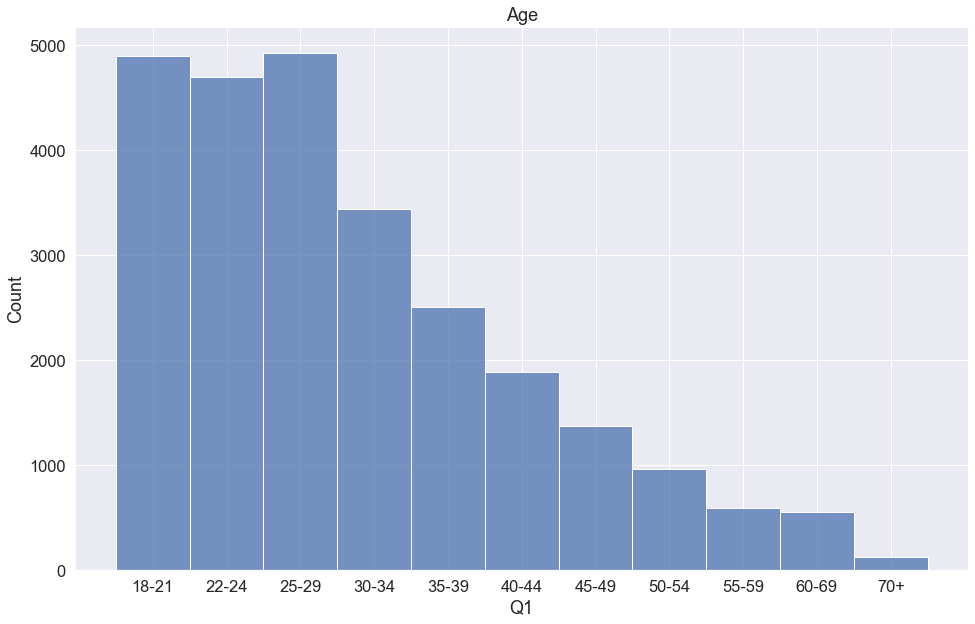

In [10]:

survey_age=survey['Q1'][1:].sort_values()
survey_age

sns.set(font_scale = 1.5)
sns.histplot(data=survey_age).set(title='Age')

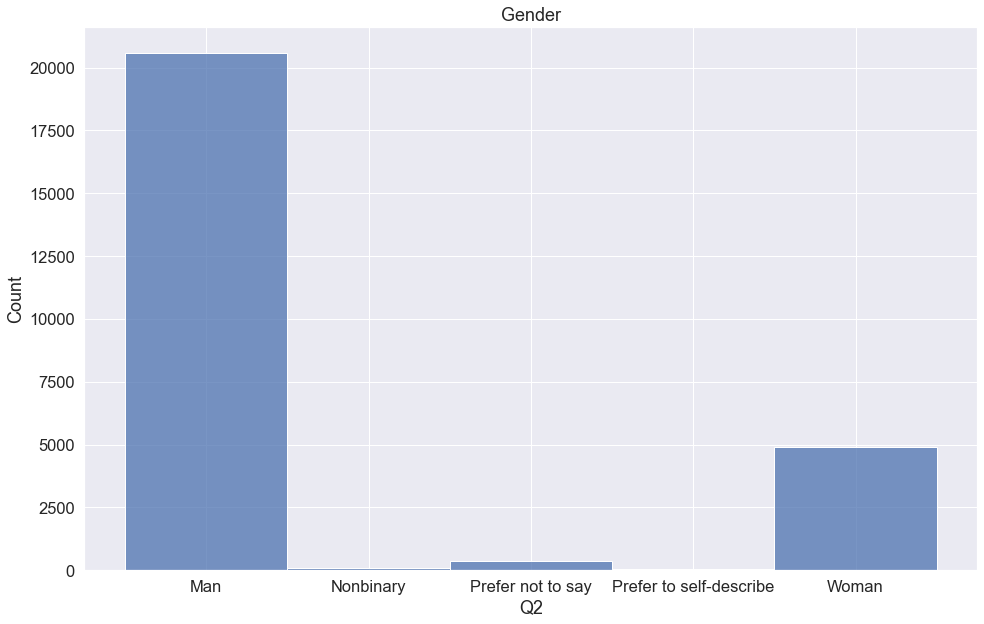

In [11]:
survey_gender=survey['Q2'][1:].sort_values()
survey_gender

sns.set(font_scale = 1.5)
ax = sns.histplot(data=survey_gender).set(title='Gender')


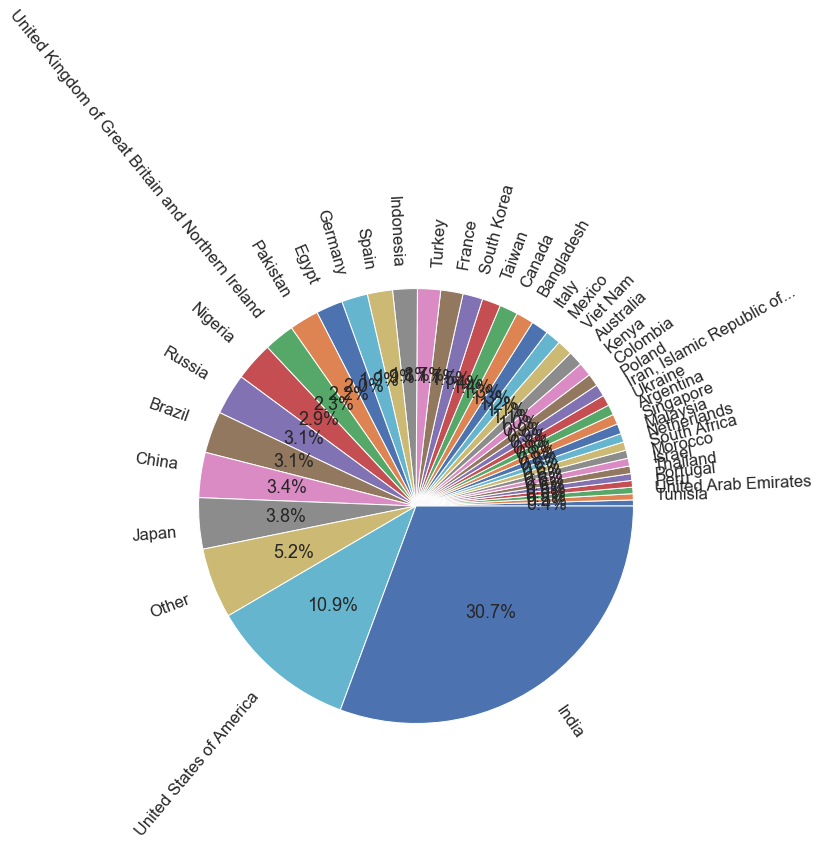

In [12]:
survey_country=pd.DataFrame(survey['Q3'][1:])

country_pie=pd.DataFrame(survey_country.groupby(['Q3'])['Q3'].count().sort_values())[25:]

country_pie['Country'] = country_pie.index

ax = plt.pie(data=country_pie, x='Q3', labels = 'Country', rotatelabels = 'true',autopct='%1.1f%%')



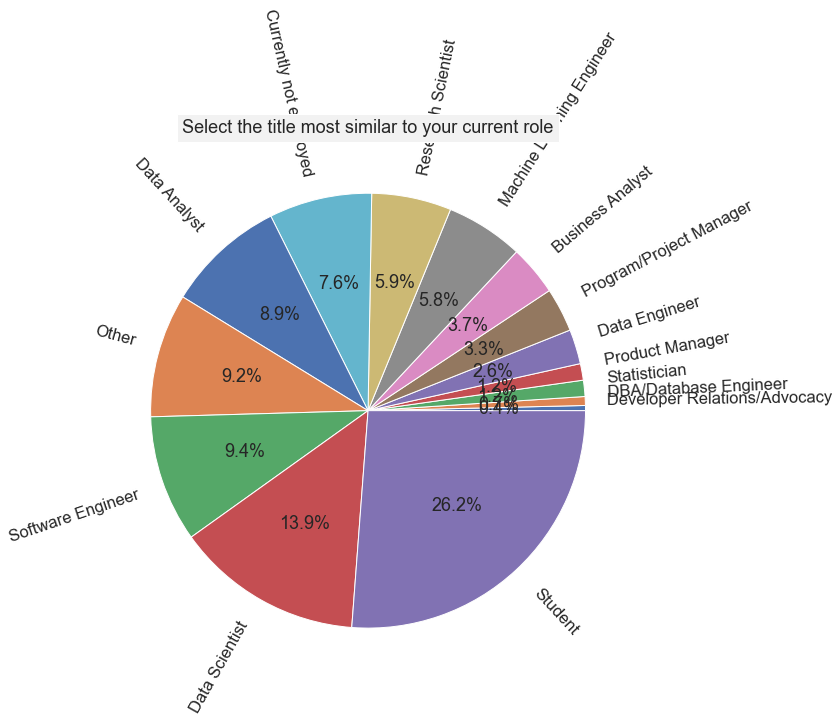

In [13]:
survey_role=pd.DataFrame(survey['Q5'][1:])

role_pie=pd.DataFrame(survey_role.groupby(['Q5'])['Q5'].count().sort_values())

role_pie['Role'] = role_pie.index

ax=plt.title("Select the title most similar to your current role", bbox={'facecolor':'0.95', 'pad':5})
ax = plt.pie(data=role_pie, x='Q5', labels = 'Role', rotatelabels = 'true',autopct='%1.1f%%')



In [14]:
def get_count(question_num, parts):
    questions = []
    questions = ['Q'+ str(question_num) +'_Part_'+ str(j) for j in range(1, parts)]
    questions.append('Q'+ str(question_num) + '_OTHER')
    
    categories = []
    values = []
    for i in questions:
        category = survey[i].value_counts().index[0]
        val = survey[i].value_counts()[0]
        
        categories.append(category)
        values.append(val)
       
    combined_df = pd.DataFrame()
    combined_df['Category'] = categories
    combined_df['Value'] = values
    
    combined_df = combined_df.sort_values(['Value'],ascending=False)
    
    return combined_df

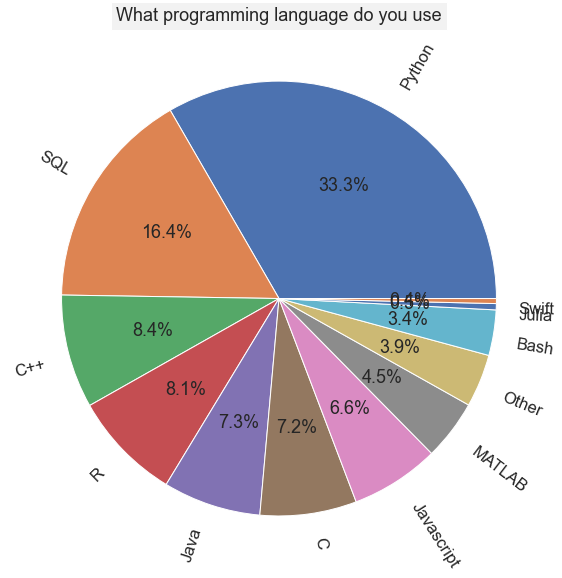

In [15]:
programming_lang = get_count(7,12)

ax = plt.pie(data=programming_lang, x='Value', labels = 'Category', rotatelabels = 'true',autopct='%1.1f%%')
ax=plt.title("What programming language do you use", bbox={'facecolor':'0.95', 'pad':5})



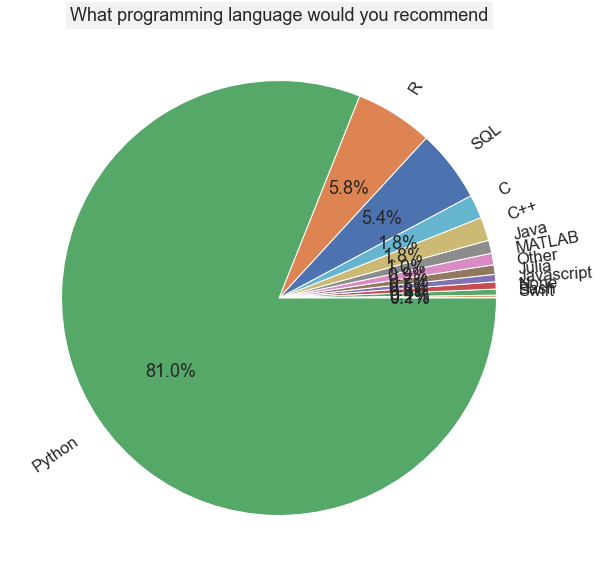

In [16]:
survey_lang_recc=pd.DataFrame(survey['Q8'][1:])
lang_recc_pie=pd.DataFrame(survey_lang_recc.groupby(['Q8'])['Q8'].count().sort_values())
lang_recc_pie['Count'] = lang_recc_pie.index
ax = plt.pie(data=lang_recc_pie, x='Q8', labels = 'Count', rotatelabels = 'true',autopct='%1.1f%%')
ax=plt.title("What programming language would you recommend", bbox={'facecolor':'0.95', 'pad':5})


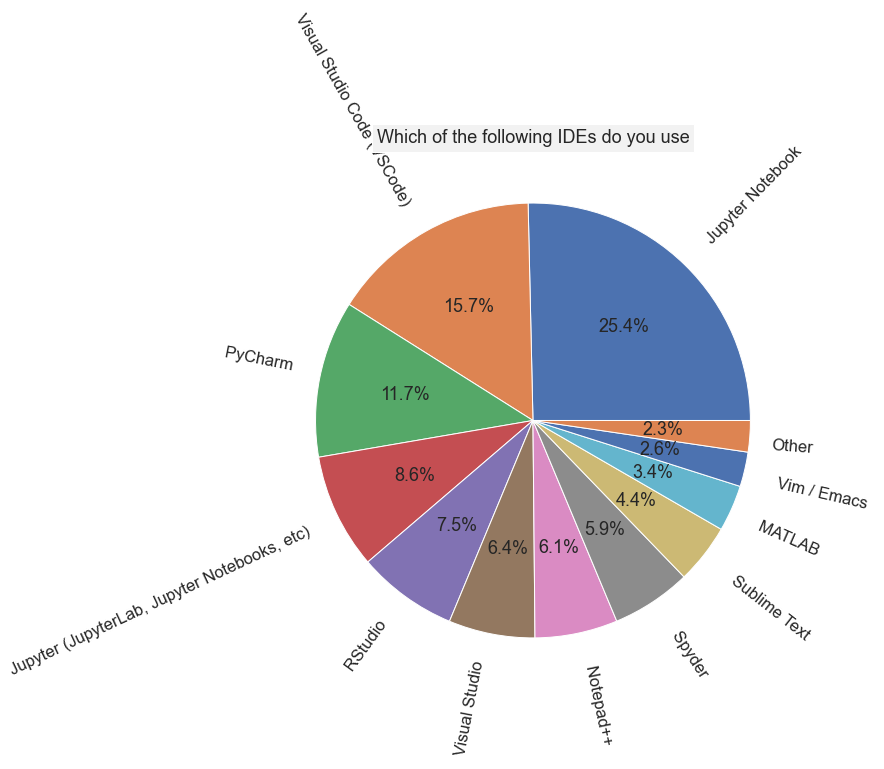

In [17]:
survey_ide = get_count(9,12)

ax = plt.pie(data=survey_ide, x='Value', labels = 'Category', rotatelabels = 'true',autopct='%1.1f%%')
ax=plt.title("Which of the following IDEs do you use", bbox={'facecolor':'0.95', 'pad':5})
